# LeR complete examples of BNS events (O4 design sensitivity)

* I am using Amplitude Spectral Density (asds) included in [bilby](https://github.com/lscsoft/bilby/tree/master/bilby) package; L1:'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'

* LeR by default set the mass range (detector frame) $M_{tot}$=[2.0, 200.0], for the SNR calculation

* I will change it to $M_{tot}$=[1.0, 100.0], as the default source $m_1^{max}=2.3$ and so the maximum detector frame $M_{tot}$ can be $M_{tot}^{max}*(1+z_{max})\sim 51$. Here $z_{max}=10$.

* I will consider both **sup** and **sub** events for the BNS events, where
    * sup: super-threshold evevnts, SNR>8
    * sub: sub+super-threshold evevnts, SNR>6

## Models Considered

### Mass model: BNS mass distribution: Bimodal Gaussian Model

Refer to this sub-section of the LeR documentation for more details: [Default BNS mass model](https://ler.readthedocs.io/en/latest/GW_events.html#BNS-mass-distribution:-Bimodal-Gaussian-Model)

### Merger rate density model: BBH (population I/II star) merger-rate density [WIERDA et al. 2021](https://arxiv.org/pdf/2106.06303.pdf)

Refer to this sub-section of the LeR documentation for more details: [Default BNS red-shift distribution](https://ler.readthedocs.io/en/latest/GW_events.html#Merger-Rate-Density-Formula)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ler.rates import LeR
from ler.utils import get_param_from_json

##  Un-lensed events

In [2]:
ler = LeR(verbose=False, event_type='BNS', mtot_max=51, z_max=10)

### Sup

In [3]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=1000, batch_size=200000,snr_threshold=8.0, output_jsonfile='n_unlensed_detectable_bns.json', meta_data_file='n_unlensed_detectable_bns_meta.json', resume=False);

collected number of detectable events =  0
collected number of detectable events =  4
total number of events =  200000
total unlensed rate (yr^-1): 9.139469111588523
collected number of detectable events =  11
total number of events =  400000
total unlensed rate (yr^-1): 12.56677002843422
collected number of detectable events =  19
total number of events =  600000
total unlensed rate (yr^-1): 14.470826093348498
collected number of detectable events =  26
total number of events =  800000
total unlensed rate (yr^-1): 14.851637306331352
collected number of detectable events =  31
total number of events =  1000000
total unlensed rate (yr^-1): 14.166177122962212
collected number of detectable events =  41
total number of events =  1200000
total unlensed rate (yr^-1): 15.613259732297063
collected number of detectable events =  46
total number of events =  1400000
total unlensed rate (yr^-1): 15.014842111895433
collected number of detectable events =  52
total number of events =  1600000
tota

SystemError: CPUDispatcher(<function get_interpolated_snr at 0x29ac5d480>) returned a result with an exception set

In [3]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_meta.json')
meta_data.keys()

dict_keys(['events_total', 'detectable_events', 'total_rate'])

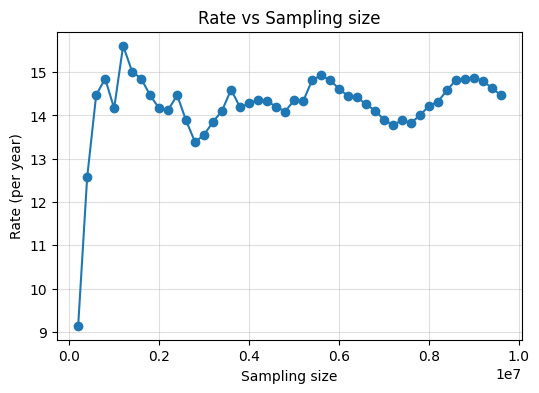

In [4]:
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [10]:
# select only events after sampling size of 2.5e7
idx = np.where(meta_data['events_total'] > 2.3e7)[0]
# take average of the rate after 2.3e7
rate = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate)

Rate (per year) = 3.0639446086041384


* Conclusion is, you will need at-least 30 million samples to get a good estimate of detection rate for BNS events.

* You can get away with lesser sample if you set z_max=5, but that is not a realistic scenario.

* Rate obtained from the simulation (super-threshold) is ~3.06 detectable BNS events per year.

### Sub

In [24]:
# snr_cut=6.0
ler.selecting_n_unlensed_detectable_events(size=1000, batch_size=100000,snr_threshold=6.0, output_jsonfile='n_unlensed_detectable_bns_sub.json', meta_data_file='n_unlensed_detectable_bns_sub_meta.json', resume=True);

collected number of detectable events =  1000
storing detectable unlensed params in ./ler_data/n_unlensed_detectable_bns_sub.json

 trmming final result to size=1000


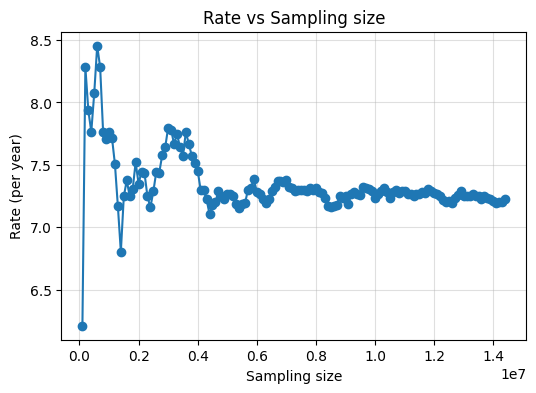

In [32]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_sub_meta.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [33]:
# select only events after sampling size of 1e7
idx = np.where(meta_data['events_total'] > 1e7)[0]
# take average of the rate after 1e7
rate = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate)

Rate (per year) = 7.254233879342404


* Rate obtained from the simulation (sub+super-threshold) is ~7.25 detectable BNS events per year.

* This is 2.37 times higher than the rate obtained from the super-threshold events. 

## Lensed events

In [22]:
from ler.rates import LeR
ler = LeR(npool=6, 
    verbose=False, 
    event_type='BNS', 
    mtot_max=51, 
    z_max=10,
    source_priors=dict(
        merger_rate_density='merger_rate_density_bbh_popI_II_oguri2018',
    ),
    source_priors_params=dict(
        merger_rate_density=dict(
            R0=105.5 * 1e-9,
            b2=1.6,
            b3=2.0,
            b4=30
        ),
    ),
)

In [23]:
ler.normalization_pdf_z, ler.normalization_pdf_z_lensed, ler.normalization_pdf_z/ler.normalization_pdf_z_lensed

(456973.4555794262, 1001.9054447467333, 456.10437389622354)

# markdown table

| $R_o (Gpc^{-1}yr^{-1})$ | Unlensed | Lensed | ratio | $z_{max}$ (unlensed) | 
| --- | --- | --- | --- | --- |
| 1540 | - | - | - | - |
| 105.5 | 13.361 | 0.0306 | 436.12 | 10 |
| 105.5 | 12.678 | 0.0306 | 414.31 | 0.2 |

In [21]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=10000, batch_size=200000,snr_threshold=8.0, output_jsonfile='n_unlensed_detectable_bns_test2.json', meta_data_file='n_unlensed_detectable_bns_meta_test2.json', resume=False);

collected number of detectable events =  0
collected number of detectable events =  9679
total number of events =  200000
total unlensed rate (yr^-1): 12.73333322929624
collected number of detectable events =  19275
total number of events =  400000
total unlensed rate (yr^-1): 12.678737369288408
storing detectable unlensed params in ./ler_data/n_unlensed_detectable_bns_test2.json

 trmming final result to size=10000


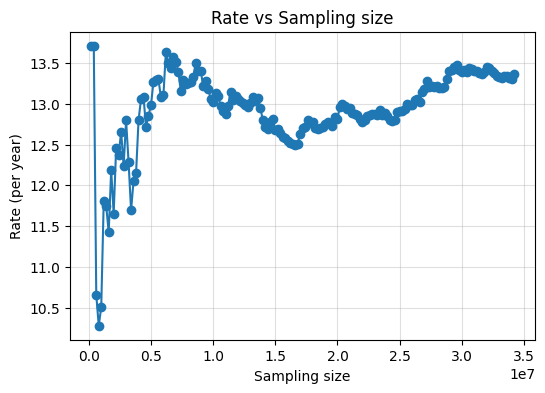

In [12]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_meta_test.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [15]:
unlensed_params = get_param_from_json('ler_data/n_unlensed_detectable_bns_test.json')
zs = unlensed_params['zs']
min(zs), max(zs), len(zs)

(0.001058220913335349, 0.15532618110461377, 1000)

In [10]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=1000, batch_size=200000,snr_threshold=8.0, num_img=2, output_jsonfile='n_lensed_detectable_bns_test.json', meta_data_file='n_lensed_detectable_bns_meta_test.json', resume=True);

collected number of detectable events =  886.0


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.23s/it]


collected number of events =  892.0
total number of events =  29400000
total lensed rate (yr^-1): 0.030397947507281843


100%|███████████████████████████████████████████████████████████████| 12/12 [00:03<00:00,  3.29it/s]


collected number of events =  900.0
total number of events =  29600000
total lensed rate (yr^-1): 0.03046334122540743


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.62it/s]


collected number of events =  908.0
total number of events =  29800000
total lensed rate (yr^-1): 0.03052785717550449


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.64it/s]


collected number of events =  917.0
total number of events =  30000000
total lensed rate (yr^-1): 0.030624909761091813


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.13it/s]


collected number of events =  924.0
total number of events =  30200000
total lensed rate (yr^-1): 0.030654325528012637


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.33it/s]


collected number of events =  930.0
total number of events =  30400000
total lensed rate (yr^-1): 0.030650396829423093


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.67it/s]


collected number of events =  932.0
total number of events =  30600000
total lensed rate (yr^-1): 0.03051555145437763


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.35it/s]


collected number of events =  940.0
total number of events =  30800000
total lensed rate (yr^-1): 0.030577633703309393


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.21s/it]


collected number of events =  942.0
total number of events =  31000000
total lensed rate (yr^-1): 0.030444997708110412


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.10it/s]


collected number of events =  948.0
total number of events =  31200000
total lensed rate (yr^-1): 0.030442511590381513


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.18s/it]


collected number of events =  954.0
total number of events =  31400000
total lensed rate (yr^-1): 0.03044005714294215


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.18it/s]


collected number of events =  960.0
total number of events =  31600000
total lensed rate (yr^-1): 0.03043763376445772


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.11it/s]


collected number of events =  964.0
total number of events =  31800000
total lensed rate (yr^-1): 0.03037222794766827


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.04it/s]


collected number of events =  971.0
total number of events =  32000000
total lensed rate (yr^-1): 0.03040156833903369


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.65it/s]


collected number of events =  984.0
total number of events =  32200000
total lensed rate (yr^-1): 0.03061723470903061


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.51it/s]


collected number of events =  990.0
total number of events =  32400000
total lensed rate (yr^-1): 0.030613777478372406


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.68s/it]


collected number of events =  998.0
total number of events =  32600000
total lensed rate (yr^-1): 0.030671829259424535


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.16it/s]


collected number of events =  1003.0
total number of events =  32800000
total lensed rate (yr^-1): 0.03063753539881017
storing detectable lensed params in ./ler_data/n_lensed_detectable_bns_test.json

 trmming final result to size=1000


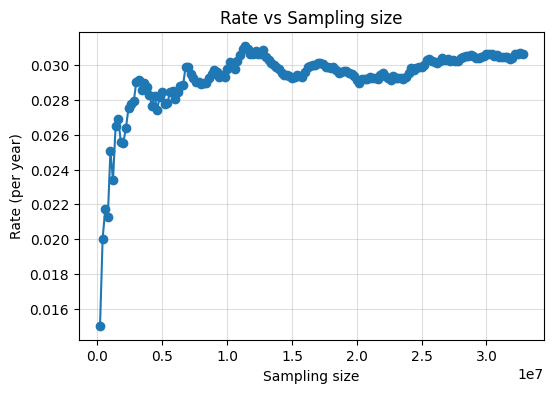

In [13]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bns_meta_test.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [11]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=1000, batch_size=200000,snr_threshold=8.0, num_img=2, output_jsonfile='n_lensed_detectable_bns.json', meta_data_file='n_lensed_detectable_bns_meta.json', resume=False);

collected number of detectable events =  0


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.19s/it]


collected number of events =  7
total number of events =  200000
total lensed rate (yr^-1): 0.035066690566135664


100%|███████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.63it/s]


collected number of events =  13
total number of events =  400000
total lensed rate (yr^-1): 0.032561926954268836


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.48it/s]


collected number of events =  16
total number of events =  600000
total lensed rate (yr^-1): 0.026717478526579557


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.78it/s]


collected number of events =  28
total number of events =  800000
total lensed rate (yr^-1): 0.035066690566135664


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.38it/s]


collected number of events =  32
total number of events =  1000000
total lensed rate (yr^-1): 0.03206097423189547


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.73it/s]


collected number of events =  36
total number of events =  1200000
total lensed rate (yr^-1): 0.030057163342402


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.86s/it]


collected number of events =  41
total number of events =  1400000
total lensed rate (yr^-1): 0.029341516596154336


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.28it/s]


collected number of events =  49
total number of events =  1600000
total lensed rate (yr^-1): 0.03068335424536871


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.07it/s]


collected number of events =  59
total number of events =  1800000
total lensed rate (yr^-1): 0.032840234022254035


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.34it/s]


collected number of events =  67
total number of events =  2000000
total lensed rate (yr^-1): 0.03356383239901557


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.07it/s]


collected number of events =  73
total number of events =  2200000
total lensed rate (yr^-1): 0.03324504430295979


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.06it/s]


collected number of events =  79
total number of events =  2400000
total lensed rate (yr^-1): 0.03297938755624664


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.87it/s]


collected number of events =  88
total number of events =  2600000
total lensed rate (yr^-1): 0.033910645822197126


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.07it/s]


collected number of events =  96
total number of events =  2800000
total lensed rate (yr^-1): 0.034351043819888


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.12it/s]


collected number of events =  106
total number of events =  3000000
total lensed rate (yr^-1): 0.035400659047717914


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.21it/s]


collected number of events =  110
total number of events =  3200000
total lensed rate (yr^-1): 0.03444049966316896


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.62it/s]


collected number of events =  115
total number of events =  3400000
total lensed rate (yr^-1): 0.03388797827819834


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.08it/s]


collected number of events =  123
total number of events =  3600000
total lensed rate (yr^-1): 0.03423176936218006


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.68s/it]


collected number of events =  128
total number of events =  3800000
total lensed rate (yr^-1): 0.03374839392831102


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.00it/s]


collected number of events =  133
total number of events =  4000000
total lensed rate (yr^-1): 0.03331335603782888


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.65it/s]


collected number of events =  134
total number of events =  4200000
total lensed rate (yr^-1): 0.03196555466572911


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.04it/s]


collected number of events =  143
total number of events =  4400000
total lensed rate (yr^-1): 0.032561926954268836


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.19it/s]


collected number of events =  150
total number of events =  4600000
total lensed rate (yr^-1): 0.032670829720002174


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.32it/s]


collected number of events =  151
total number of events =  4800000
total lensed rate (yr^-1): 0.03151827544932432


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.70s/it]


collected number of events =  155
total number of events =  5000000
total lensed rate (yr^-1): 0.031059068787148734


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.74s/it]


collected number of events =  160
total number of events =  5200000
total lensed rate (yr^-1): 0.030827859838361026


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.07it/s]


collected number of events =  165
total number of events =  5400000
total lensed rate (yr^-1): 0.030613777478372406


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.74s/it]


collected number of events =  169
total number of events =  5600000
total lensed rate (yr^-1): 0.030236075028963916


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.93it/s]


collected number of events =  176
total number of events =  5800000
total lensed rate (yr^-1): 0.030402647978521564


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.57it/s]


collected number of events =  184
total number of events =  6000000
total lensed rate (yr^-1): 0.030725100305566487


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.18it/s]


collected number of events =  190
total number of events =  6200000
total lensed rate (yr^-1): 0.03070355395191602


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.28it/s]


collected number of events =  201
total number of events =  6400000
total lensed rate (yr^-1): 0.031466092874077096


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.19s/it]


collected number of events =  206
total number of events =  6600000
total lensed rate (yr^-1): 0.031271594184519254


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.18it/s]


collected number of events =  214
total number of events =  6800000
total lensed rate (yr^-1): 0.03153055370232367


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.30s/it]


collected number of events =  218
total number of events =  7000000
total lensed rate (yr^-1): 0.031202198136398265


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.12it/s]


collected number of events =  220
total number of events =  7200000
total lensed rate (yr^-1): 0.030613777478372406


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.06it/s]


collected number of events =  229
total number of events =  7400000
total lensed rate (yr^-1): 0.03100491173608134


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.20s/it]


collected number of events =  234
total number of events =  7600000
total lensed rate (yr^-1): 0.03084814132509679


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.24s/it]


collected number of events =  245
total number of events =  7800000
total lensed rate (yr^-1): 0.03147010691832688


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.57it/s]


collected number of events =  251
total number of events =  8000000
total lensed rate (yr^-1): 0.03143478332892876


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.90it/s]


collected number of events =  256
total number of events =  8200000
total lensed rate (yr^-1): 0.03127899925062973


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.09it/s]


collected number of events =  265
total number of events =  8400000
total lensed rate (yr^-1): 0.03160773129260528


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.97it/s]


collected number of events =  272
total number of events =  8600000
total lensed rate (yr^-1): 0.0316881722059432


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.92it/s]


collected number of events =  278
total number of events =  8800000
total lensed rate (yr^-1): 0.031651103822680896


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.17it/s]


collected number of events =  284
total number of events =  9000000
total lensed rate (yr^-1): 0.03161568292311914


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.69s/it]


collected number of events =  287
total number of events =  9200000
total lensed rate (yr^-1): 0.03125509376546875


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.06it/s]


collected number of events =  293
total number of events =  9400000
total lensed rate (yr^-1): 0.0312296058841269


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.91it/s]


collected number of events =  304
total number of events =  9600000
total lensed rate (yr^-1): 0.03172700575031322


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.33s/it]


collected number of events =  310
total number of events =  9800000
total lensed rate (yr^-1): 0.03169292733382524


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.20it/s]


collected number of events =  312
total number of events =  10000000
total lensed rate (yr^-1): 0.03125944987609808


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.20s/it]


collected number of events =  316
total number of events =  10200000
total lensed rate (yr^-1): 0.031039423582349776


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.69s/it]


collected number of events =  325
total number of events =  10400000
total lensed rate (yr^-1): 0.031309545148335415


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.09it/s]


collected number of events =  330
total number of events =  10600000
total lensed rate (yr^-1): 0.031191395921360564


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.36it/s]


collected number of events =  343
total number of events =  10800000
total lensed rate (yr^-1): 0.03181977477297496


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.68s/it]


collected number of events =  353
total number of events =  11000000
total lensed rate (yr^-1): 0.03215205654505426


100%|███████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.96it/s]


collected number of events =  364
total number of events =  11200000
total lensed rate (yr^-1): 0.032561926954268836


100%|███████████████████████████████████████████████████████████████| 15/15 [00:03<00:00,  3.81it/s]


collected number of events =  374
total number of events =  11400000
total lensed rate (yr^-1): 0.03286952950309459


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.14s/it]


collected number of events =  382
total number of events =  11600000
total lensed rate (yr^-1): 0.03299378274941829


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:08<00:00,  1.23s/it]


collected number of events =  394
total number of events =  11800000
total lensed rate (yr^-1): 0.03345345298561127


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.68s/it]


collected number of events =  401
total number of events =  12000000
total lensed rate (yr^-1): 0.033480340278620006


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:09<00:00,  1.61s/it]


collected number of events =  405
total number of events =  12200000
total lensed rate (yr^-1): 0.033259975829707134


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:10<00:00,  1.83s/it]


collected number of events =  409
total number of events =  12400000
total lensed rate (yr^-1): 0.03304671991140435


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.23s/it]


collected number of events =  416
total number of events =  12600000
total lensed rate (yr^-1): 0.03307878293766993


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.18s/it]


collected number of events =  422
total number of events =  12800000
total lensed rate (yr^-1): 0.03303157013149386


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.20it/s]


collected number of events =  431
total number of events =  13000000
total lensed rate (yr^-1): 0.033217018975834005


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.69it/s]


collected number of events =  434
total number of events =  13200000
total lensed rate (yr^-1): 0.03294143659243048


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.22it/s]


collected number of events =  442
total number of events =  13400000
total lensed rate (yr^-1): 0.033047925864034045


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.38it/s]


collected number of events =  450
total number of events =  13600000
total lensed rate (yr^-1): 0.0331512830982375


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.21it/s]


collected number of events =  454
total number of events =  13800000
total lensed rate (yr^-1): 0.03296123709529108


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.18it/s]


collected number of events =  460
total number of events =  14000000
total lensed rate (yr^-1): 0.032919750327392666


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.65s/it]


collected number of events =  470
total number of events =  14200000
total lensed rate (yr^-1): 0.03316165908668765


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.02s/it]


collected number of events =  476
total number of events =  14400000
total lensed rate (yr^-1): 0.03311854109023924


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.52it/s]


collected number of events =  479
total number of events =  14600000
total lensed rate (yr^-1): 0.03287073342696475


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.06s/it]


collected number of events =  486
total number of events =  14800000
total lensed rate (yr^-1): 0.032900408523440026


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]


collected number of events =  489
total number of events =  15000000
total lensed rate (yr^-1): 0.03266211749874351


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.81it/s]


collected number of events =  493
total number of events =  15200000
total lensed rate (yr^-1): 0.0324960121223776


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.82it/s]


collected number of events =  500
total number of events =  15400000
total lensed rate (yr^-1): 0.03252939755671212


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.02it/s]


collected number of events =  510
total number of events =  15600000
total lensed rate (yr^-1): 0.03275460107825859


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.44it/s]


collected number of events =  516
total number of events =  15800000
total lensed rate (yr^-1): 0.03272045629679205


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.91it/s]


collected number of events =  522
total number of events =  16000000
total lensed rate (yr^-1): 0.032687165134862174


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.09s/it]


collected number of events =  524
total number of events =  16200000
total lensed rate (yr^-1): 0.03240731191649927


100%|█████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.75it/s]


collected number of events =  532
total number of events =  16400000
total lensed rate (yr^-1): 0.03250083515885745


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.69s/it]


collected number of events =  540
total number of events =  16600000
total lensed rate (yr^-1): 0.0325921048291106


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.07s/it]


collected number of events =  544
total number of events =  16800000
total lensed rate (yr^-1): 0.03244265249656089


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.68s/it]


SystemError: CPUDispatcher(<function get_interpolated_snr at 0x29ac5d480>) returned a result with an exception set

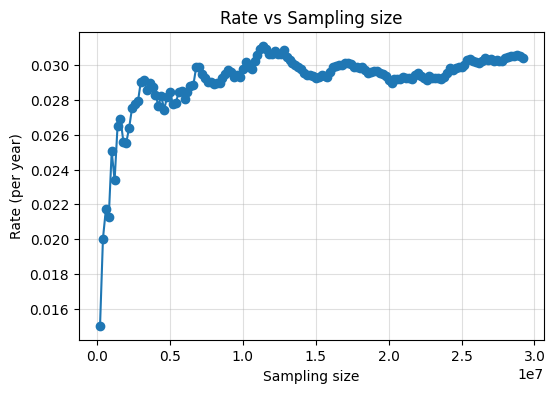

In [9]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bns_meta_test.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [45]:
# select only events after sampling size of 1e7
idx = np.where(meta_data['events_total'] > 2e7)[0]
# take average of the rate after 1e7
rate = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate)

Rate (per year) = 0.007576792374189939


* Rate obtained from the simulation (super-threshold) is ~0.0076 detectable BNS events per year.

In [146]:
# snr_cut=6.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=3500, batch_size=100000,snr_threshold=6.0, num_img=2, output_jsonfile='n_lensed_detectable_bns_sub.json', meta_data_file='n_lensed_detectable_bns__sub_meta.json', resume=True);

collected number of detectable events =  3575.0
storing detectable lensed params in ./ler_data/n_lensed_detectable_bns_sub.json

 trmming final result to size=3500


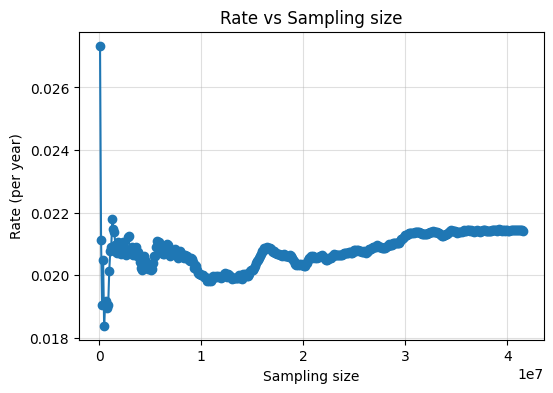

In [147]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bns__sub_meta.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [148]:
# select only events after sampling size of 1e7
idx = np.where(meta_data['events_total'] > 3e7)[0]
# take average of the rate after 1e7
rate = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate)

Rate (per year) = 0.0213948570740686


In [149]:
0.0213948570740686/0.007576792374189939

2.8237354301735107

* Rate obtained from the simulation (sub+super-threshold) is ~0.02 detectable BNS events per year.

* This is 2.8 times higher than the rate obtained from the super-threshold events. 

### sup

In [150]:
sup_lensed = get_param_from_json('ler_data/n_lensed_detectable_bns.json')

# get snrs
sup_snrs = sup_lensed['optimal_snr_net']

# check each row for 3 and 4 images with snr>8
sup_idx_2 = np.where(np.sum(sup_snrs>8, axis=1)==2)[0]
sup_idx_3 = np.where(np.sum(sup_snrs>8, axis=1)==3)[0]
sup_idx_4 = np.where(np.sum(sup_snrs>8, axis=1)==4)[0]

print('Total number of detectable events:', len(sup_snrs))
print('\nNumber of events with detectable 2 images or more:', len(sup_idx_2))
print(f'Total/2_images: {len(sup_idx_2)/len(sup_snrs)*100}%')
print('\nNumber of events with detectable 3 images or more:', len(sup_idx_3))
print(f'Total/3_images: {len(sup_idx_3)/len(sup_snrs)*100}%')
print('\nNumber of events with detectable 4 images:', len(sup_idx_4))
print(f'Total/4_images: {len(sup_idx_4)/len(sup_snrs)*100}%')

Total number of detectable events: 1000

Number of events with detectable 2 images or more: 949
Total/2_images: 94.89999999999999%

Number of events with detectable 3 images or more: 45
Total/3_images: 4.5%

Number of events with detectable 4 images: 6
Total/4_images: 0.6%


In [151]:
sub_lensed = get_param_from_json('ler_data/n_lensed_detectable_bns_sub.json')

# get snrs
sub_snrs = sub_lensed['optimal_snr_net']

# check each row for 3 and 4 images with snr>6
sub_idx_2 = np.where(np.sum(sub_snrs>6, axis=1)==2)[0]
sub_idx_3 = np.where(np.sum(sub_snrs>6, axis=1)==3)[0]
sub_idx_4 = np.where(np.sum(sub_snrs>6, axis=1)==4)[0]

print('Total number of detectable events:', len(sub_snrs))
print('\nNumber of events with detectable 2 images or more:', len(sub_idx_2))
print(f'Total/2_images: {len(sub_idx_2)/len(sub_snrs)*100}%')
print('\nNumber of events with detectable 3 images or more:', len(sub_idx_3))
print(f'Total/3_images: {len(sub_idx_3)/len(sub_snrs)*100}%')
print('\nNumber of events with detectable 4 images:', len(sub_idx_4))
print(f'Total/4_images: {len(sub_idx_4)/len(sub_snrs)*100}%')

Total number of detectable events: 3500

Number of events with detectable 2 images or more: 3313
Total/2_images: 94.65714285714286%

Number of events with detectable 3 images or more: 170
Total/3_images: 4.857142857142857%

Number of events with detectable 4 images: 17
Total/4_images: 0.48571428571428565%


## Time delay distribution

### Lensed sub events

In [159]:
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns_sub.json")

# time delays according to image type difference
# dn0 for [typeI,typeI] or [typeII,typeII]
# dn90 for [typeI,typeII] or [typeI,typeII]
img_type = lensed_params_detectable['image_type']
dt_eff = lensed_params_detectable['effective_geocent_time']
snr_l = lensed_params_detectable['optimal_snr_net']
mu = lensed_params_detectable['magnifications']

In [153]:
dt0 = []
dt90 = []
dmu0 = []
dmu90 = []

list_idx = np.array([[0,1],
                  [0,2],
                  [0,3],
                  [1,2],
                  [1,3],
                  [2,3],])

for j in range(len(img_type)):
    for idx in list_idx:
        dn = abs(img_type[j][idx[0]]-img_type[j][idx[1]])
        snr1 = snr_l[j][idx[0]]
        snr2 = snr_l[j][idx[1]]

        if dn==0 and snr1>8 and snr2>8:
            # tye I-I, II-II
            dt0.append(abs(dt_eff[j][idx[0]]-dt_eff[j][idx[1]])/ (24*3600))
            dmu0.append(abs(mu[j][idx[0]]/mu[j][idx[1]]))
        if dn==1 and snr1>8 and snr2>8:
            # tye I-I, II-II
            dt90.append(abs(dt_eff[j][idx[0]]-dt_eff[j][idx[1]])/ (24*3600))
            dmu90.append(abs(mu[j][idx[0]]/mu[j][idx[1]]))

dt0 = np.array(dt0)
dt90 = np.array(dt90)
dmu0 = np.array(dmu0)
dmu90 = np.array(dmu90)

log_dt0 = np.log10(dt0)
log_dt90 = np.log10(dt90)

### Un-lensed sub events

In [154]:
unlensed_params_detectable = get_param_from_json("ler_data/n_unlensed_detectable_bns_sub.json")

# simulating time delay difference and magnification ratio, for unlensed population
size = 1000

t = unlensed_params_detectable["geocent_time"]
mu = unlensed_params_detectable["luminosity_distance"]

len_ = len(t)
t_ = []
mu_ = []
idx1 = np.random.choice(np.arange(0,len_), size, replace=False)
idx2 = np.random.choice(np.arange(0,len_), size, replace=False)
t_.append(t[idx2] - t[idx1])
mu_.append(mu[idx2] / mu[idx1])

dt_ul = np.abs(np.array(t_).flatten()) / (60 * 60 * 24)  # in days
dmu_ul = np.abs(np.array(mu_).flatten())**2

# unlensed
log_dt_ul = np.log10(dt_ul)
log_dmu_ul = np.log10(dmu_ul)
# avoid inf
idx_nan = np.isinf(log_dt_ul)
log_dt_ul = log_dt_ul[~idx_nan]
log_dmu_ul = log_dmu_ul[~idx_nan]

In [155]:
# kde for time delays
from sklearn.neighbors import KernelDensity

kde_log_dt0 = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(np.array(log_dt0).reshape(-1,1))
kde_log_dt90 = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(np.array(log_dt90).reshape(-1,1))
kde_log_dt_ul = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(np.array(log_dt_ul).reshape(-1,1))

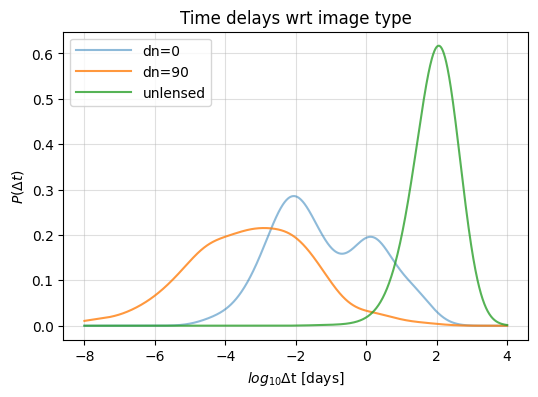

In [156]:
# plot
plt.figure(figsize=(6,4))
dt_log = np.linspace(-8, 4, 1000)
plt.plot(dt_log, np.exp(kde_log_dt0.score_samples(dt_log.reshape(-1,1))), label='dn=0', color='C0', linestyle='-', alpha=0.5)
plt.plot(dt_log, np.exp(kde_log_dt90.score_samples(dt_log.reshape(-1,1))), label='dn=90', color='C1', linestyle='-', alpha=0.8)
plt.plot(dt_log, np.exp(kde_log_dt_ul.score_samples(dt_log.reshape(-1,1))), label='unlensed', color='C2', linestyle='-', alpha=0.8)

plt.xlabel(r'$log_{10}\Delta$t [days]')
plt.ylabel(r'$P(\Delta t)$')
plt.title('Time delays wrt image type')
leg = plt.legend(handlelength=4)
for line in leg.get_lines():
    line.set_linewidth(1.5)
plt.grid(alpha=0.4)
#plt.xlim(-3, 3)
#plt.savefig("redshift_distribution_bns.png")
plt.show()

* time delay distribution for lensed events are very different from the un-lensed events.

* for lensed events the time delay distribution is very broad, with a peak around ~15mins-1day. This very unlike BBH events, where the peak is at ~7-10days.

* This shows lensed BNS events need higher magnification to be detectable. Higher magnification is associated with smaller time delay.

* This can also be simply from the lack of data

## Magnification distribution 

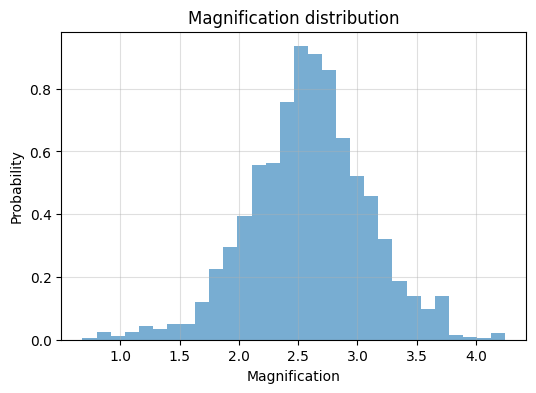

In [3]:
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns.json")

snr_l = lensed_params_detectable['optimal_snr_net'].flatten()
mu = lensed_params_detectable['magnifications'].flatten()
mu_arr = abs(mu[np.where(snr_l>8)[0]])

# plot histogram
plt.figure(figsize=(6,4))
plt.hist(np.log10(mu_arr[mu_arr<20000]), bins=30, alpha=0.6, density=True)
plt.xlabel('Magnification')
plt.ylabel('Probability')
plt.title('Magnification distribution')
plt.grid(alpha=0.4)
plt.show()

In [162]:
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns_sub.json")

snr_l = lensed_params_detectable['optimal_snr_net'].flatten()
mu = lensed_params_detectable['magnifications'].flatten()
mu_arr = abs(mu[np.where(snr_l>6)[0]])

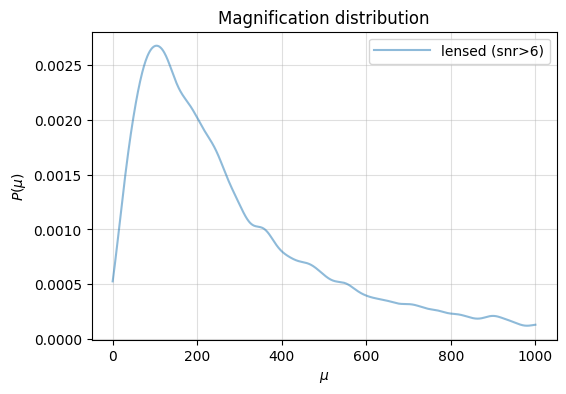

In [168]:
# make kde
from sklearn.neighbors import KernelDensity

kde_mu = KernelDensity(kernel='gaussian', bandwidth=20).fit(mu_arr.reshape(-1,1))

# plot
plt.figure(figsize=(6,4))
mu = np.linspace(0, 1000, 1000)
plt.plot(mu, np.exp(kde_mu.score_samples(mu.reshape(-1,1))), label='lensed (snr>6)', color='C0', linestyle='-', alpha=0.5)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$P(\mu)$')
plt.title('Magnification distribution')
leg = plt.legend(handlelength=4)
for line in leg.get_lines():
    line.set_linewidth(1.5)
plt.grid(alpha=0.4)
#plt.xlim(-3, 3)
#plt.savefig("redshift_distribution_bns.png")
plt.show()

* which is quite high as compared to the BBH events.

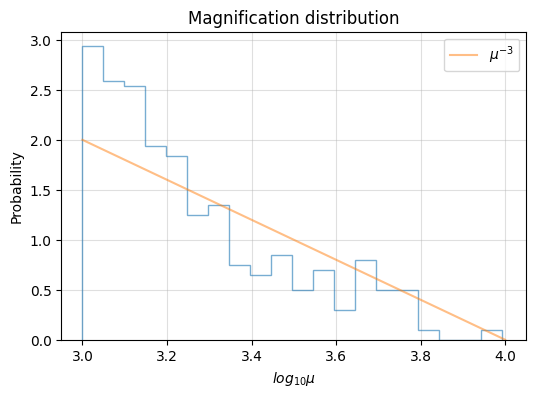

In [23]:
# check mu^-3 distribution relation
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns.json")

mu = lensed_params_detectable['magnifications'].flatten()
mu_arr = abs(mu)
log10_mu = np.log10(mu_arr)
idx = (log10_mu>3) & (log10_mu<4.1)
log10_mu = log10_mu[idx]

# mu^-3
log10_mu_ = np.linspace(3, 4, 100)
mu_ = 10**log10_mu_
pdf_mu = np.log10(mu_**(-2))+8

plt.figure(figsize=(6,4))
plt.hist(log10_mu, bins=20, alpha=0.6, density=True, histtype='step')
plt.plot(log10_mu_, pdf_mu, label=r'$\mu^{-3}$', color='C1', linestyle='-', alpha=0.5)
plt.xlabel(r'$log_{10}\mu$')
plt.ylabel('Probability')
plt.title('Magnification distribution')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

In [1]:
443.1/0.998

443.9879759519038